In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing

## 1. Load the dataset into python environment


In [2]:
data = pd.read_csv('titanic_dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 2. Make ‘PassengerId’ as the index column


In [3]:
data.set_index('PassengerId',inplace=True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## 3. Check the basic details of the dataset


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
data.shape

(891, 11)

In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

- There are 3 columns with missing data

## 4. Fill in all the missing values present in all the columns in the dataset


In [8]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

1. Age

In [9]:
data['Age'].isna().sum()

177

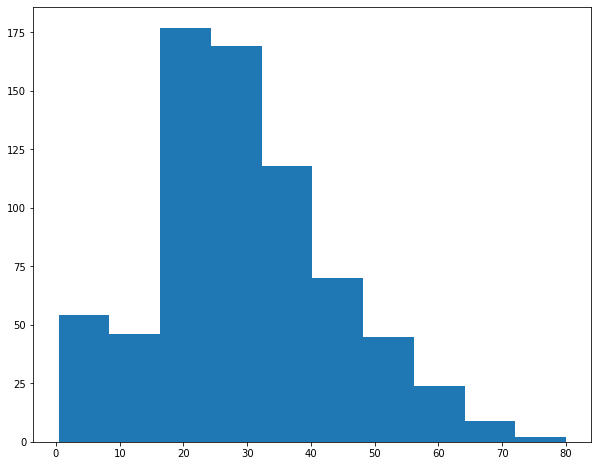

In [10]:
fig,ax =plt.subplots(figsize=(10,8))
plt.hist(data.Age)
plt.show()

In [11]:
data['Age']= data['Age'].fillna(data['Age'].median())

2. Cabin

In [12]:
data['Cabin'].isna().sum()

687

In [13]:
data.drop(['Cabin'],axis=1,inplace=True)

- Cabin column is been dropped as more than half of the values are missing in the dataset

In [14]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


3. Embarked

In [15]:
data['Embarked'].isna().sum()

2

In [16]:
data['Embarked'].mode()

0    S
dtype: object

In [17]:
data['Embarked']= data['Embarked'].fillna(data['Embarked'].mode()[0])

In [18]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

## 5. Check and handle outliers in at least 3 columns in the dataset


1. Fare

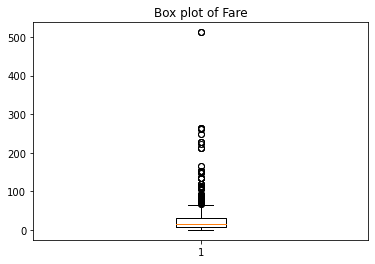

In [19]:
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')
plt.show()

In [20]:
Q1=np.percentile(data['Fare'], 25, interpolation='midpoint')
Q2=np.percentile(data['Fare'], 50, interpolation='midpoint')
Q3=np.percentile(data['Fare'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [21]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(IQR)
print(low_lim)
print(up_lim)

23.0896
-26.724
65.6344


In [22]:
d=data[(data['Fare']<low_lim)|(data['Fare']>up_lim)]
index=d.index
index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

In [23]:
data.drop(index, inplace=True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


2. Age

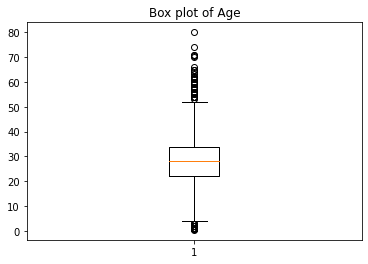

In [24]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')
plt.show()

In [25]:
Q1=np.percentile(data['Age'], 25, interpolation='midpoint')
Q2=np.percentile(data['Age'], 50, interpolation='midpoint')
Q3=np.percentile(data['Age'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
34.0


In [26]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(IQR)
print(low_lim)
print(up_lim)

12.0
4.0
52.0


In [27]:
d=data[(data['Age']<low_lim)|(data['Age']>up_lim)]
index=d.index
index

Int64Index([  7,   8,  12,  16,  17,  34,  44,  55,  79,  95,  97, 117, 120,
            153, 165, 171, 173, 175, 184, 194, 206, 233, 250, 253, 262, 281,
            318, 327, 341, 349, 375, 382, 387, 408, 457, 468, 470, 480, 484,
            488, 493, 494, 514, 531, 546, 556, 571, 572, 583, 626, 627, 631,
            643, 645, 648, 673, 685, 695, 756, 773, 775, 789, 804, 825, 828,
            832, 852],
           dtype='int64', name='PassengerId')

In [28]:
data.drop(index, inplace=True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


3.SibSp

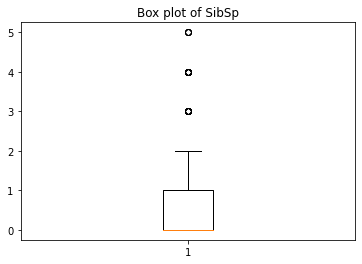

In [29]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')
plt.show()

In [30]:
Q1=np.percentile(data['SibSp'], 25, interpolation='midpoint')
Q2=np.percentile(data['SibSp'], 50, interpolation='midpoint')
Q3=np.percentile(data['SibSp'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [31]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(IQR)
print(low_lim)
print(up_lim)

1.0
-1.5
2.5


In [32]:
d=data[(data['SibSp']<low_lim)|(data['SibSp']>up_lim)]
index=d.index
index

Int64Index([ 25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 267,
            279, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788, 814, 820,
            851],
           dtype='int64', name='PassengerId')

In [33]:
data.drop(index, inplace=True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


In [34]:
data.shape

(681, 10)

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)


In [35]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [36]:
Y=data['Survived']
X=data.drop(['Survived','Name','Sex','Ticket','Embarked'],axis=1)

In [37]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,681.000000,681.000000,681.000000,681.000000,681.000000
mean,2.500734,28.616740,0.265786,0.268722,16.590772
std,0.721772,9.077604,0.495410,0.753252,13.260513
min,1.000000,4.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.854200
50%,3.000000,28.000000,0.000000,0.000000,10.500000
75%,3.000000,33.000000,0.000000,0.000000,23.250000
max,3.000000,52.000000,2.000000,6.000000,65.000000


In [38]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
X = min_max.fit_transform(X)
X = pd.DataFrame(X)
X.describe()

,0,1,2,3,4
count,681.000000,681.000000,681.000000,681.000000,681.000000
mean,0.750367,0.512849,0.132893,0.044787,0.255243
std,0.360886,0.189117,0.247705,0.125542,0.204008
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.395833,0.000000,0.000000,0.120834
50%,1.000000,0.500000,0.000000,0.000000,0.161538
75%,1.000000,0.604167,0.000000,0.000000,0.357692
max,1.000000,1.000000,1.000000,1.000000,1.000000
